<a href="https://colab.research.google.com/github/kipronoEzra/IN17-00017-20/blob/main/practical_machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine learning model**

## Loading data


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data preparation


### Data separation

In [ ]:
y = df ['logS']

y

In [ ]:
 x = df.drop ('logS', axis=1)
 x

### Data Spilting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=100)

In [ ]:
x_train


## Model BUiliding

### Linear Regression

#### Training The Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Applying the model to make Prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)



In [ ]:
 y_lr_train_pred

In [ ]:
y_lr_test_pred

#### Evalaute model Perfomance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [ ]:
print('LR MSE(Train):', lr_train_mse)
print('LR MSE(Train):', lr_train_r2)
print('LR MSE(Test):', lr_train_mse)
print('LR MSE(Test):', lr_train_r2)

In [ ]:
lr_results = pd.DataFrame(['LinearRegression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,method,Training MSE,Training R2,Test MSE,Test R2
0,LinearRegression,1.007536,0.764505,1.020695,0.789162


### **Random Forest**

####Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor (max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Aplying the model to make prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)



#### Evaluating The *Perfomance*

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['  RandomForest', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,method,Training MSE,Training R2,Test MSE,Test R2
0,RandomForest,1.028228,0.759669,1.407688,0.709223


## Model Comparison

In [ ]:
df_models = pd.concat((lr_results, rf_results), axis=0)
df_models
df_models.reset_index()

,index,method,Training MSE,Training R2,Test MSE,Test R2
0,0,LinearRegression,1.007536,0.764505,1.020695,0.789162
1,0,RandomForest,1.028228,0.759669,1.407688,0.709223


#**Data viusalization of prediction Results**

Text(0.5, 0, 'Experimental Logs')

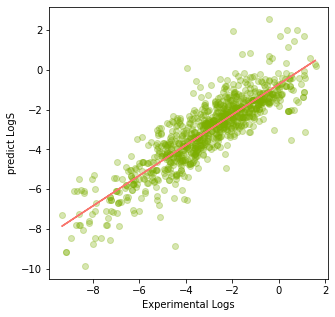

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c= '#7cae00', alpha= 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train,p(y_train), '#f8766d')
plt.ylabel('predict LogS')
plt.xlabel('Experimental Logs')